<a href="https://colab.research.google.com/github/IMRO832000/CSE573_merlion_anomaly_detection/blob/main/swm_project_code_group30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install salesforce-merlion
!git clone https://github.com/salesforce/Merlion.git
!pip install Merlion/ts_datasets/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
Cloning into 'Merlion'...
remote: Enumerating objects: 13705, done.
remote: Counting objects: 100% (13705/13705), done.
remote: Compressing objects: 100% (1793/1793), done.
remote: Total 13705 (delta 11916), reused 13620 (delta 11896), pack-reused 0
Receiving objects: 100% (13705/13705), 103.35 MiB | 26.23 MiB/s, done.
Resolving deltas: 100% (11916/11916), done.
Processing ./Merlion/ts_datasets
  Preparing metadata (setup.py) ... done
  Created wheel for ts-datasets: filename=ts_datasets-0.1.0-py3-none-any.whl size=28760 sha256=c7dd13e413643078857bc26d5412fdb3c767b5db32269121a580654b7bb6a478
  Stored in directory: /tmp/pip-ephem-wheel-cache-gljnxbi4/wheels/2c/b6/40/b024

In [ ]:
from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from merlion.plot import plot_anoms
np.random.seed(1234)

# This is a time series with anomalies in both the train and test split.
# time_series and metadata are both time-indexed pandas DataFrames.
#realKnownCause: Real-world datasets with known causes for anomalies.
time_series, metadata = NAB(subset="realKnownCause")[3]

In [ ]:
#trial block
# use for preprocessing and data exploration
# ts ,mt = NAB(subset="realKnownCause")[:6]
ts , mt = NAB(subset="artificialWithAnomaly")[2]
print(ts)


NAB Download: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]


                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739
...                        ...
2014-04-14 23:35:00  18.074649
2014-04-14 23:40:00  21.002014
2014-04-14 23:45:00  20.566713
2014-04-14 23:50:00  18.254193
2014-04-14 23:55:00  21.863147

[4032 rows x 1 columns]


In [ ]:
#same as above
print(mt)

                     anomaly  trainval
timestamp                             
2013-07-04 00:00:00    False      True
2013-07-04 01:00:00    False      True
2013-07-04 02:00:00    False      True
2013-07-04 03:00:00    False      True
2013-07-04 04:00:00    False      True
...                      ...       ...
2014-05-28 11:00:00    False     False
2014-05-28 12:00:00    False     False
2014-05-28 13:00:00    False     False
2014-05-28 14:00:00    False     False
2014-05-28 15:00:00    False     False

[7267 rows x 2 columns]


1.Initializing an anomaly detection model : https://opensource.salesforce.com/Merlion/v2.0.2/merlion.models.html <br>
2.Training the model [how do we wanna do it]<br>
3.Producing a series of anomaly scores with the model<br>
4.Quantitatively evaluating the model[what metrics to use and why are we using it]<br>
5.Visualizing the model’s predictions<br>
6.Saving and loading a trained model<br>
7.Simulating the live deployment of a model using a TSADEvaluator[this is mentioned in the documentation , but what is TSADEvaluator and why do we wanna use it?]<br>


code for isolation forest :
https://opensource.salesforce.com/Merlion/v1.0.2/examples/anomaly/1_AnomalyFeatures.html#Model-Initialization


In [ ]:
#data split
from merlion.utils import TimeSeries
from merlion.plot import plot_anoms
from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB
# Get training split
train = time_series[metadata.trainval]
train_data = TimeSeries.from_pd(train)
train_labels = TimeSeries.from_pd(metadata[metadata.trainval].anomaly)

# Get testing split
test = time_series[~metadata.trainval]
test_data = TimeSeries.from_pd(test)
test_labels = TimeSeries.from_pd(metadata[~metadata.trainval].anomaly)

In [ ]:
#isolation forest - multivariate model
from merlion.models.anomaly.isolation_forest import IsolationForest, IsolationForestConfig

In [ ]:
#info about default params are here : https://github.com/salesforce/Merlion/blob/main/conf/benchmark_anomaly.json
isf_config = IsolationForestConfig()
isf  = IsolationForest(isf_config)

In [ ]:
#training part:
from merlion.evaluate.anomaly import TSADMetric
# we never used TSADMetric here , why are we importing it ? [there in docs , have to find if I missed a line of code ]
# prophet detector needed TSADMetric , this model doesnt need it

# Train isolationforest in the default way, using the ground truth anomaly labels
# to set the post-rule's threshold
print(f"Training {type(isf).__name__}...")
train_scores_isf = isf.train(train_data=train_data, anomaly_labels=train_labels)


Training IsolationForest...


In [ ]:
# using model for anomaly detection
scores_isf = isf.get_anomaly_score(test_data)
scores_isf_df = scores_isf.to_pd()
print(f"{type(isf).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_isf_df[scores_isf_df.iloc[:, 0] != 0])
print()
labels_isf = isf.get_anomaly_label(test_data)
labels_isf_df = labels_isf.to_pd()
print(f"{type(isf).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_isf_df[labels_isf_df.iloc[:, 0] != 0])
print()

print(f"{type(isf).__name__} fires {(labels_isf_df.values != 0).sum()} alarms")
print()

print("Raw scores at the locations where alarms were fired:")
print(scores_isf_df[labels_isf_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

IsolationForest.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:55:00    0.424103
2013-12-14 17:00:00    0.418938
2013-12-14 17:05:00    0.484891
2013-12-14 17:10:00    0.500257
2013-12-14 17:15:00    0.449213
...                         ...
2014-02-19 15:05:00    0.419456
2014-02-19 15:10:00    0.415807
2014-02-19 15:15:00    0.406724
2014-02-19 15:20:00    0.427094
2014-02-19 15:25:00    0.428348

[19279 rows x 1 columns]

IsolationForest.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-16 16:00:00    3.251397
2013-12-16 18:35:00    3.681691
2013-12-27 19:25:00    3.914430
2013-12-27 23:20:00    3.260543
2013-12-28 04:15:00    3.738462
2013-12-28 06:20:00    3.303482
2014-01-02 10:00:00    3.233514
2014-01-05 17:50:00    3.791805
2014-01-12 09:25:00    3.535895
2014-01-13 10:05:00    3.314500
2014-01-16 12:50:00    3.850349
2014-01-24 12:50

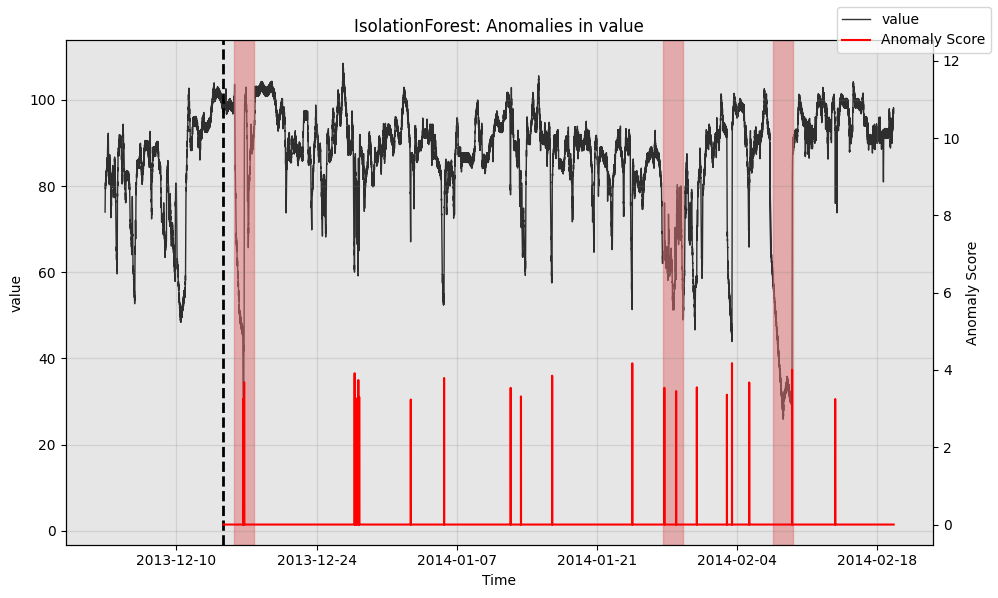

In [ ]:
#plotting the anomaly scores
fig, ax = isf.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax, anomaly_labels=test_labels)
plt.show()
print()

In [ ]:
#Random Cut forest : https://opensource.salesforce.com/Merlion/v2.0.2/merlion.models.anomaly.html#module-merlion.models.anomaly.random_cut_forest
from merlion.models.anomaly.random_cut_forest import RandomCutForestConfig,RandomCutForest

In [ ]:
rrcf_config = RandomCutForestConfig()
rrcf = RandomCutForest(rrcf_config)
# # Get training split
# train = time_series[metadata.trainval]
# train_data = TimeSeries.from_pd(train)
# train_labels = TimeSeries.from_pd(metadata[metadata.trainval].anomaly)

# # Get testing split
# test = time_series[~metadata.trainval]
# test_data = TimeSeries.from_pd(test)
# test_labels = TimeSeries.from_pd(metadata[~metadata.trainval].anomaly)


In [ ]:
from merlion.evaluate.anomaly import TSADMetric

# Train random cut Forest in the default way, using the ground truth anomaly labels
# to set the post-rule's threshold
print(f"Training {type(rrcf).__name__}...")
train_scores_1 = rrcf.train(train_data=train_data, anomaly_labels=train_labels)


Training RandomCutForest...


In [ ]:
scores_rrcf = rrcf.get_anomaly_score(test_data)
scores_rrcf_df = scores_rrcf.to_pd()
print(f"{type(rrcf).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_rrcf_df[scores_rrcf_df.iloc[:, 0] != 0])
print()
labels_rrcf = rrcf.get_anomaly_label(test_data)
labels_rrcf_df = labels_rrcf.to_pd()
print(f"{type(rrcf).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_rrcf_df[labels_rrcf_df.iloc[:, 0] != 0])
print()

print(f"{type(rrcf).__name__} fires {(labels_rrcf_df.values != 0).sum()} alarms")
print()

print("Raw scores at the locations where alarms were fired:")
print(scores_rrcf_df[labels_rrcf_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

RandomCutForest.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:55:00    0.618877
2013-12-14 17:00:00    0.625018
2013-12-14 17:05:00    0.775386
2013-12-14 17:10:00    0.724158
2013-12-14 17:15:00    0.769053
...                         ...
2014-02-19 15:05:00    0.573701
2014-02-19 15:10:00    0.565725
2014-02-19 15:15:00    0.559168
2014-02-19 15:20:00    0.572162
2014-02-19 15:25:00    0.594461

[19279 rows x 1 columns]

RandomCutForest.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-16 16:10:00    3.160948
2013-12-16 18:35:00    3.708456
2013-12-17 02:25:00    3.148979
2013-12-27 19:30:00    4.111896
2013-12-28 04:05:00    3.114837
2013-12-28 06:25:00    3.035640
2014-01-02 10:10:00    3.538317
2014-01-05 17:50:00    3.550247
2014-01-12 09:25:00    3.376130
2014-01-16 12:50:00    3.686133
2014-01-20 13:35:00    3.010551
2014-01-24 09:05

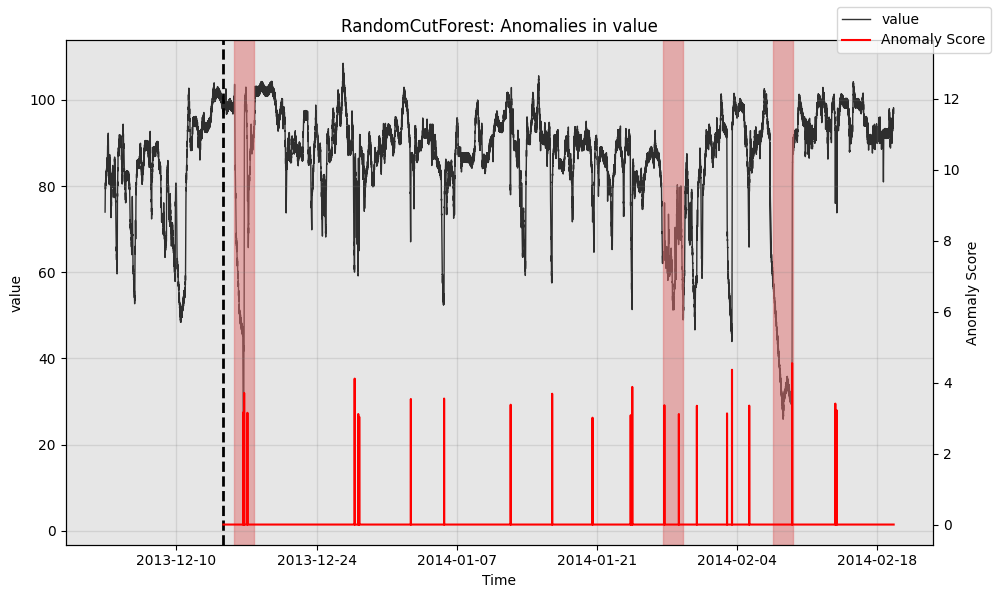

In [ ]:
fig_rrcf, ax_rrcf = rrcf.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax_rrcf, anomaly_labels=test_labels)
plt.show()
print()

In [ ]:
#ZMS : it is applicable to univariate time series , model initialization is done
from merlion.models.anomaly.zms import ZMSConfig, ZMS
zms_config = ZMSConfig()
zms = ZMS(zms_config)

In [ ]:
# Train ZMS in the default way, using the ground truth anomaly labels
# to set the post-rule's threshold
print(f"Training {type(zms).__name__}...")
train_scores_zms = zms.train(train_data=train_data, anomaly_labels=train_labels)


Training ZMS...


In [ ]:
#model inference -  {we might need to change it , ZMS doesn fire alarms}
scores_zms = zms.get_anomaly_score(test_data)
scores_zms_df = scores_zms.to_pd()
print(f"{type(zms).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_zms_df[scores_zms_df.iloc[:, 0] != 0])
print()
labels_zms = zms.get_anomaly_label(test_data)
labels_zms_df = labels_zms.to_pd()
print(f"{type(zms).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_zms_df[labels_zms_df.iloc[:, 0] != 0])
print()

print(f"{type(zms).__name__} fires {(labels_zms_df.values != 0).sum()} alarms")
print()

print("Raw scores at the locations where alarms were fired:")
print(scores_zms_df[labels_zms_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

ZMS.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:50:00    1.108174
2013-12-14 16:55:00    1.149769
2013-12-14 17:00:00    1.207711
2013-12-14 17:05:00    1.056718
2013-12-14 17:10:00    1.166906
...                         ...
2014-02-19 15:05:00    1.156367
2014-02-19 15:10:00    1.127272
2014-02-19 15:15:00    1.076240
2014-02-19 15:20:00    1.146556
2014-02-19 15:25:00    1.058564

[19280 rows x 1 columns]

ZMS.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-16 17:20:00   -3.260870
2013-12-17 03:40:00    3.256572
2013-12-27 19:30:00    4.186012
2013-12-28 04:20:00    3.743783
2013-12-28 06:40:00    3.253525
2014-01-02 10:35:00    3.409498
2014-01-05 17:50:00    3.654037
2014-01-12 09:30:00    3.717227
2014-01-16 12:50:00    3.780947
2014-01-24 12:50:00    3.272108
2014-01-30 23:50:00    3.434808
2014-02-03 11:55:00    4.117687
2014-02-

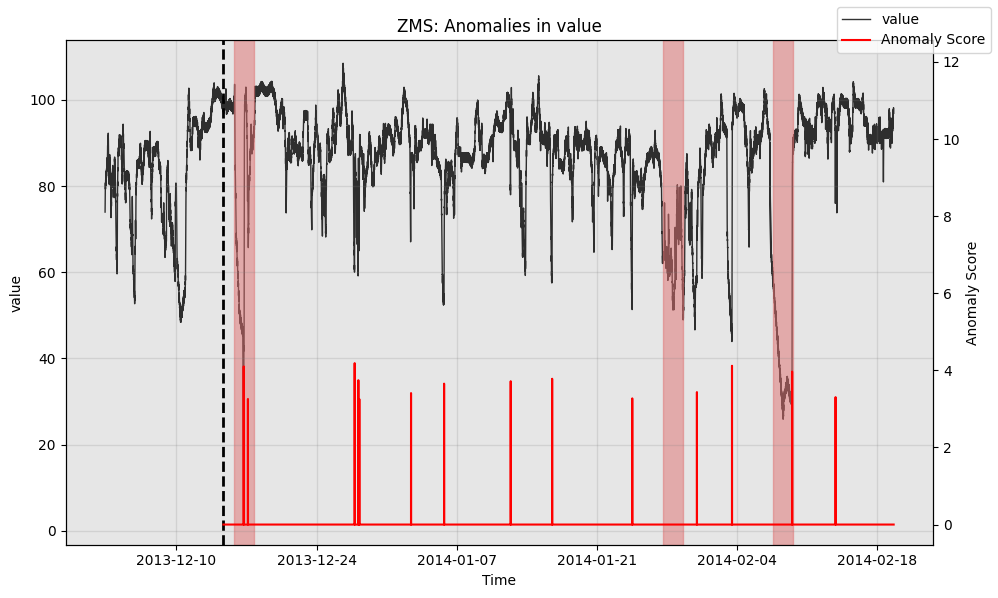

In [ ]:
#visualization
fig_zms, ax_zms = zms.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax_zms, anomaly_labels=test_labels)
plt.show()
print()

In [ ]:
#autoencoders - deep learning model , multivariate analysis , model initialization is done
from merlion.models.anomaly.autoencoder import AutoEncoderConfig,AutoEncoder
ae_config = AutoEncoderConfig()
ae = AutoEncoder(ae_config)

In [ ]:
print(f"Training {type(ae).__name__}...")
train_scores_ae = ae.train(train_data=train_data, anomaly_labels=train_labels)


Training AutoEncoder...
 |========================================| 100.0% Complete, Loss 0.0000


In [ ]:
scores_ae = ae.get_anomaly_score(test_data)
scores_ae_df = scores_ae.to_pd()
print(f"{type(ae).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_ae_df[scores_ae_df.iloc[:, 0] != 0])
print()
labels_ae = ae.get_anomaly_label(test_data)
labels_ae_df = labels_ae.to_pd()
print(f"{type(ae).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_ae_df[labels_ae_df.iloc[:, 0] != 0])
print()

# print(f"{type(ae).__name__} fires {(labels_ae_df.values != 0).sum()} alarms")
# print()

print("Raw scores at the locations where alarms were fired:")
print(scores_ae_df[labels_ae_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

AutoEncoder.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:50:00    0.008320
2013-12-14 16:55:00    0.006963
2013-12-14 17:00:00    0.005072
2013-12-14 17:05:00    0.010000
2013-12-14 17:10:00    0.007000
...                         ...
2014-02-19 15:05:00    0.006748
2014-02-19 15:10:00    0.007697
2014-02-19 15:15:00    0.009363
2014-02-19 15:20:00    0.007068
2014-02-19 15:25:00    0.009940

[19280 rows x 1 columns]

AutoEncoder.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-16 08:35:00    0.084213
2013-12-16 10:45:00    0.095928
2013-12-16 12:50:00    0.134700
2013-12-16 14:55:00    0.197513
2013-12-16 17:00:00    1.691796
2013-12-26 15:05:00    0.088999
2013-12-26 17:15:00    0.120913
2014-01-30 18:30:00    0.084949
2014-02-03 09:30:00    0.093776
2014-02-03 11:35:00    0.202529
2014-02-07 22:05:00    0.090053
2014-02-08 00:10:00    0

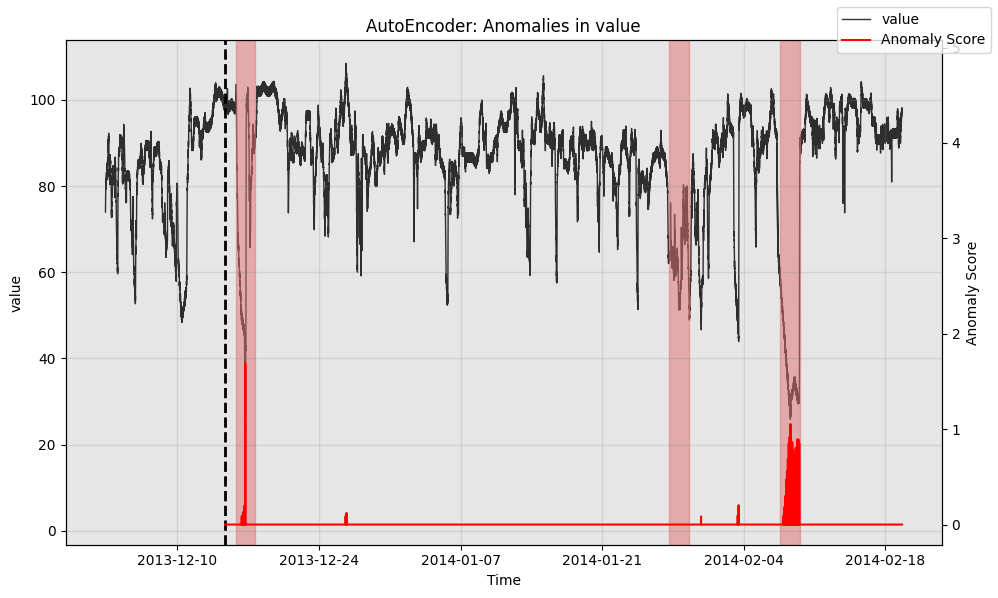

In [ ]:
#model visualization
fig_ae, ax_ae = ae.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax_ae, anomaly_labels=test_labels)
plt.show()
print()

In [ ]:
#VAE - deeplearnign model , multivariate analysis , model initialization is done
from merlion.models.anomaly.vae import VAEConfig, VAE
vae_config = VAEConfig()
vae = VAE(vae_config)

In [ ]:
print(f"Training {type(vae).__name__}...")
train_scores_vae = vae.train(train_data=train_data, anomaly_labels=train_labels)


Training VAE...
 |========================================| 100.0% Complete, Loss 0.0012


In [ ]:
scores_vae = vae.get_anomaly_score(test_data)
scores_vae_df = scores_vae.to_pd()
print(f"{type(vae).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_vae_df[scores_vae_df.iloc[:, 0] != 0])
print()
labels_vae = vae.get_anomaly_label(test_data)
labels_vae_df = labels_vae.to_pd()
print(f"{type(vae).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_vae_df[labels_vae_df.iloc[:, 0] != 0])
print()

# print(f"{type(ae).__name__} fires {(labels_ae_df.values != 0).sum()} alarms")
# print()

print("Raw scores at the locations where alarms were fired:")
print(scores_vae_df[labels_vae_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

VAE.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:50:00    1.084549
2013-12-14 16:55:00    1.139422
2013-12-14 17:00:00    1.188304
2013-12-14 17:05:00    1.034119
2013-12-14 17:10:00    1.129901
...                         ...
2014-02-19 15:05:00    1.134689
2014-02-19 15:10:00    1.100790
2014-02-19 15:15:00    1.053454
2014-02-19 15:20:00    1.128599
2014-02-19 15:25:00    1.040039

[19280 rows x 1 columns]

VAE.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-16 06:40:00    3.015814
2013-12-16 08:45:00    3.752615
2013-12-16 10:50:00    3.995643
2013-12-16 12:55:00    4.136200
2013-12-16 15:00:00    4.231862
2013-12-16 17:05:00    5.032967
2014-01-05 16:35:00    2.533424
2014-01-24 12:30:00    2.616030
2014-01-28 13:50:00    3.105780
2014-01-28 16:15:00    2.605507
2014-01-29 14:15:00    2.567085
2014-01-30 17:30:00    2.820443
2014-01-

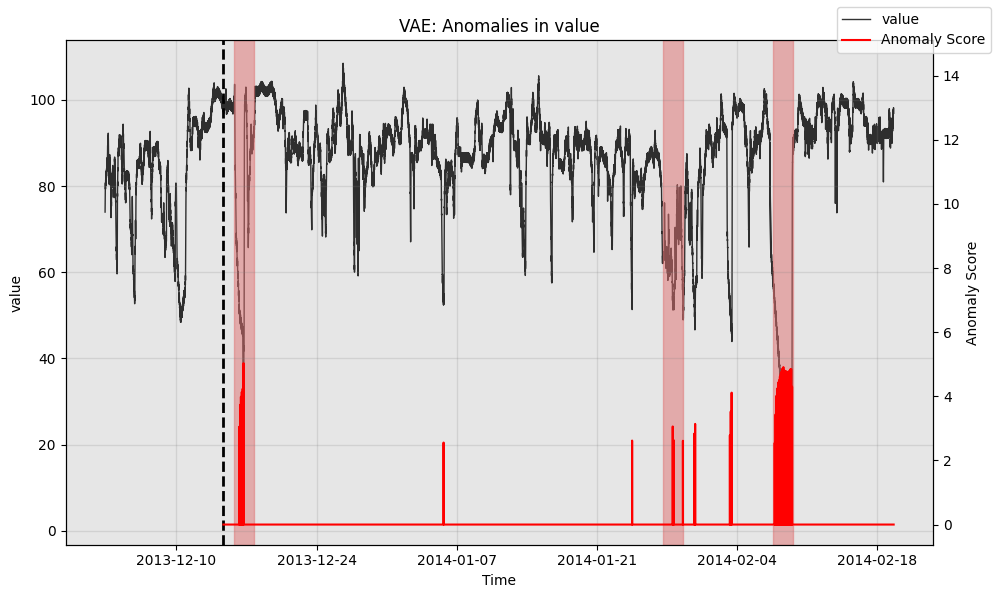

In [ ]:
#model visualization
fig_vae, ax_vae = vae.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax_vae, anomaly_labels=test_labels)
plt.show()
print()

In [ ]:
#Deep Point Anomaly Detector algorithm , multivariate analysis , model initialization is done
from merlion.models.anomaly.deep_point_anomaly_detector import DeepPointAnomalyDetectorConfig,DeepPointAnomalyDetector
dpad_config = DeepPointAnomalyDetectorConfig()
dpad = DeepPointAnomalyDetector(dpad_config)

In [ ]:
print(f"Training {type(dpad).__name__}...")
train_scores_dpad = dpad.train(train_data=train_data, anomaly_labels=train_labels)

Training DeepPointAnomalyDetector...


In [ ]:
#model inference
scores_dpad = dpad.get_anomaly_score(test_data)
scores_dpad_df = scores_dpad.to_pd()
print(f"{type(dpad).__name__}.get_anomaly_score() nonzero values (raw)")
print(scores_dpad_df[scores_dpad_df.iloc[:, 0] != 0])
print()
labels_dpad = dpad.get_anomaly_label(test_data)
labels_dpad_df = labels_dpad.to_pd()
print(f"{type(dpad).__name__}.get_anomaly_label() nonzero values (post-processed)")
print(labels_dpad_df[labels_dpad_df.iloc[:, 0] != 0])
print()

# print(f"{type(ae).__name__} fires {(labels_ae_df.values != 0).sum()} alarms")
# print()

print("Raw scores at the locations where alarms were fired:")
print(scores_dpad_df[labels_dpad_df.iloc[:, 0] != 0])
print("Post-processed scores are interpretable as z-scores")
print("Raw scores are challenging to interpret")

DeepPointAnomalyDetector.get_anomaly_score() nonzero values (raw)
                     anom_score
time                           
2013-12-14 16:55:00    0.261944
2013-12-14 17:00:00    0.502990
2013-12-14 17:05:00    3.289921
2013-12-14 17:10:00    1.253094
2013-12-14 17:15:00    0.520369
...                         ...
2014-02-19 15:05:00    0.576365
2014-02-19 15:10:00    0.123903
2014-02-19 15:15:00    0.380572
2014-02-19 15:20:00    0.719904
2014-02-19 15:25:00    1.130410

[19279 rows x 1 columns]

DeepPointAnomalyDetector.get_anomaly_label() nonzero values (post-processed)
                     anom_score
time                           
2013-12-14 21:20:00    1.663961
2013-12-15 02:00:00    1.687044
2013-12-15 08:00:00    1.732999
2013-12-15 14:30:00    1.661466
2013-12-15 16:55:00    1.808492
...                         ...
2014-02-18 14:50:00    1.853664
2014-02-18 19:35:00    2.024653
2014-02-19 01:50:00    1.942599
2014-02-19 07:45:00    1.645908
2014-02-19 14:05:00    2.03257

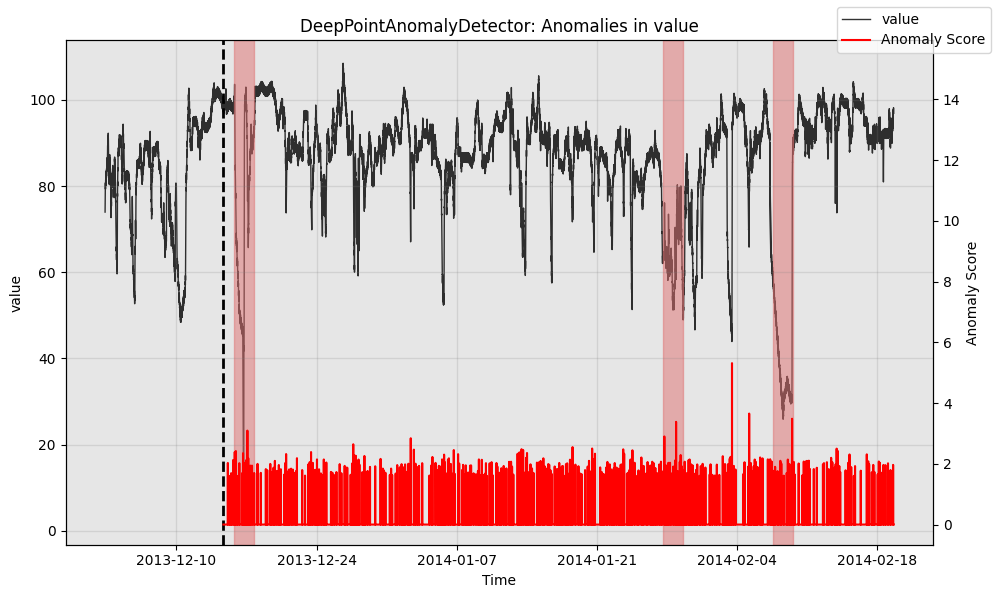

In [ ]:
#model visualization
fig_dpad, ax_dpad = dpad.plot_anomaly(time_series=test_data, time_series_prev=train_data,filter_scores=True, plot_time_series_prev=True)
plot_anoms(ax=ax_dpad, anomaly_labels=test_labels)
plt.show()
print()